<a href="https://colab.research.google.com/github/VladaDanilova/Neural-network/blob/main/%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачи
Создать многослойную нейронную сеть и обучить её для вычислениия значения выражения.  Мой персональный вариант выражения - ***sin(x,y)***.
Для решения поставленной задачи используется язык Python с библиотеками Keras и фреймворком TensorFlow.

Размер обучающей выборки 625 элементов.

##Обучение на упорядочных данных
Сначала нейронная сеть была обучена на выборках из ***n*** ***= 110, 220, 330, 440, 550, 625*** элементов соответсвенно. Элементы обучающего множества были выбраны так: ***x*** и ***y*** (от -10 до 13) разбитые на 25 элементов с шагом 1.


**На рисунке ниже** представлен **график функции** ***z = sin(x,y)***, полученный с помощью нейронной сети.

625
Epoch 1/600
88/88 - 1s - loss: 1.0050 - accuracy: 0.0458 - mae: 0.8174 - mse: 1.0050
Epoch 2/600
88/88 - 0s - loss: 0.9853 - accuracy: 0.0458 - mae: 0.8088 - mse: 0.9853
Epoch 3/600
88/88 - 0s - loss: 0.9846 - accuracy: 0.0458 - mae: 0.8084 - mse: 0.9846
Epoch 4/600
88/88 - 0s - loss: 0.9910 - accuracy: 0.0458 - mae: 0.8131 - mse: 0.9910
Epoch 5/600
88/88 - 0s - loss: 0.9882 - accuracy: 0.0458 - mae: 0.8081 - mse: 0.9882
Epoch 6/600
88/88 - 0s - loss: 0.9841 - accuracy: 0.0458 - mae: 0.8050 - mse: 0.9841
Epoch 7/600
88/88 - 0s - loss: 0.9805 - accuracy: 0.0458 - mae: 0.8073 - mse: 0.9805
Epoch 8/600
88/88 - 0s - loss: 0.9840 - accuracy: 0.0458 - mae: 0.8080 - mse: 0.9840
Epoch 9/600
88/88 - 0s - loss: 0.9756 - accuracy: 0.0458 - mae: 0.8046 - mse: 0.9756
Epoch 10/600
88/88 - 0s - loss: 0.9764 - accuracy: 0.0458 - mae: 0.8054 - mse: 0.9764
Epoch 11/600
88/88 - 0s - loss: 0.9777 - accuracy: 0.0458 - mae: 0.8053 - mse: 0.9777
Epoch 12/600
88/88 - 0s - loss: 0.9744 - accuracy: 0.0458 -

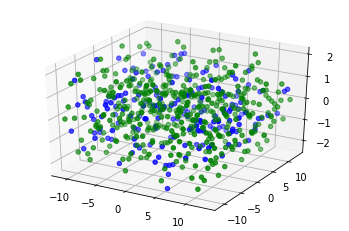

In [46]:
import math 
import random 
import numpy as np 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
 
#генерируем х, у 
def generate_data(): 
    x = list(range(-11, 14, 1)) 
    y = list(range(-11, 14, 1)) 
    return x,y 
 
# моя функция sin(x+y)
def func(x,y): 
    z = [] 
    for i in range (0,25): 
        for j in range (0,25): 
            c = [x[i], y[j], math.sin(x[i]) - math.sin(y[j])]
            z.append(c) 
    return z 

a, b = generate_data() 
z = func(a,b) 

print(len(z)) 
 
a=[] #входной
b=[] #выходной

for i in range (0, 625): 
    a.append(z[i][0:2]) 
    b.append(z[i][2]) 

# Для тренировки модели на разных выборках
x100=np.asarray(a[0:110]) 
x200=np.asarray(a[0:220]) 
x300=np.asarray(a[0:330]) 
x400=np.asarray(a[0:440]) 
x500=np.asarray(a[0:550])
x600=np.asarray(a[0:625]) 
z100=np.asarray(b[0:110]) 
z200=np.asarray(b[0:220]) 
z300=np.asarray(b[0:330]) 
z400=np.asarray(b[0:440]) 
z500=np.asarray(b[0:550]) 
z600=np.asarray(b[0:625]) 

# разделим x, y на тестовые и тренировочные сеты
x_train, x_test, y_train, y_test = train_test_split(x600, z600, test_size=0.3, random_state=100) 
#Суть параметра random_state (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях.
#В задачах машинного обучения и не только часто используется генератор псевдослучайных чисел для инициализации различных параметров, 
#весов в нейросетях, случайного разделения дата сета на обучающий и проверочный сеты.
#Соответственно если мы хотим сравнить несколько методов или разные наборы параметров, 
#то для честного сравнения надо использовать одинаковые обучающие и проверочные сеты.

# создадим модель, добавим плотные слои один за другим, указав функцию активации
model = Sequential() 
model.add(Dense(80, input_dim=2, activation='relu')) #входной слой требует input_dim param
#добавляем 4 скрытых слоя
model.add(Dense(10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='linear')) # сигмоид вместо relu для конечной вероятности от 0 до 1 - 1 выход

# скомпилируем модель, adam градиентный спуск                       точность, абс. ошибка, наим квадрт
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy','mae','mse']) 

# вызовем функцию для подгонки к данным (обучение сети)
model_h = model.fit(x_train, y_train, epochs = 600, batch_size=5, verbose=2) 

predictions_test = model.predict(x_test, batch_size=1,  verbose=0)
predictions_train = model.predict(x_train, batch_size=1,  verbose=0)   
errors=[] 

for i in range(0, predictions_train.size): 
    errors.append(abs(predictions_train[i][0]-y_train[i])) 

max_errors=np.max(np.asarray(errors)) 
print('Максимальная ошибка по модулю = ', max_errors) 

figure = plt.figure() 
ax = figure.gca(projection='3d') 

# построение тренировочных точек
x1 = np.array([p[0] for p in x_train]) 
x2 = np.array([p[1] for p in x_train]) 

ax.scatter(x1, x2, y_train,c='green') 

# построение тестовых точек
x1 = np.array([p[0] for p in x_test]) 
x2 = np.array([p[1] for p in x_test]) 

ax.scatter(x1, x2, predictions_test, c='blue') 
plt.show() 

## Обучение на неупорядочных данных

625
Epoch 1/600
88/88 - 1s - loss: 0.9543 - accuracy: 0.0000e+00 - mae: 0.7827 - mse: 0.9543
Epoch 2/600
88/88 - 0s - loss: 0.9184 - accuracy: 0.0000e+00 - mae: 0.7694 - mse: 0.9184
Epoch 3/600
88/88 - 0s - loss: 0.8930 - accuracy: 0.0000e+00 - mae: 0.7612 - mse: 0.8930
Epoch 4/600
88/88 - 0s - loss: 0.8660 - accuracy: 0.0000e+00 - mae: 0.7539 - mse: 0.8660
Epoch 5/600
88/88 - 0s - loss: 0.8405 - accuracy: 0.0000e+00 - mae: 0.7410 - mse: 0.8405
Epoch 6/600
88/88 - 0s - loss: 0.8056 - accuracy: 0.0000e+00 - mae: 0.7214 - mse: 0.8056
Epoch 7/600
88/88 - 0s - loss: 0.7708 - accuracy: 0.0000e+00 - mae: 0.7048 - mse: 0.7708
Epoch 8/600
88/88 - 0s - loss: 0.7456 - accuracy: 0.0000e+00 - mae: 0.6907 - mse: 0.7456
Epoch 9/600
88/88 - 0s - loss: 0.6809 - accuracy: 0.0000e+00 - mae: 0.6632 - mse: 0.6809
Epoch 10/600
88/88 - 0s - loss: 0.6271 - accuracy: 0.0000e+00 - mae: 0.6277 - mse: 0.6271
Epoch 11/600
88/88 - 0s - loss: 0.5890 - accuracy: 0.0000e+00 - mae: 0.6041 - mse: 0.5890
Epoch 12/600
88

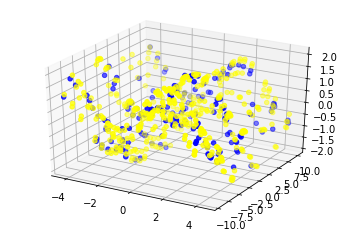

In [48]:
import math 
import random 
import numpy as np 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
 
# рандомный x, y
def get_random_data(): 
    x = np.array([random.uniform(-5,5) for i in range(25)]) 
    y = np.array([random.uniform(-10,10) for i in range(25)]) 
    return x,y 
 
# моя функция sin(x+y)
def func(x,y): 
    z = [] 
    for i in range (0,25): 
        for j in range (0,25): 
            c = [x[i], y[j], math.sin(x[i]) - math.sin(y[j])]
            z.append(c) 
    return z 

a, b = get_random_data() 
z = func(a,b) 

print(len(z)) 
a=[] #входной
b=[] #выходной

for i in range (0, 625): 
    a.append(z[i][0:2]) 
    b.append(z[i][2]) 

# Для тренировки модели на разных выборках
x100=np.asarray(a[0:110]) 
x200=np.asarray(a[0:220]) 
x300=np.asarray(a[0:330]) 
x400=np.asarray(a[0:440]) 
x500=np.asarray(a[0:550])
x600=np.asarray(a[0:625]) 
z100=np.asarray(b[0:110]) 
z200=np.asarray(b[0:220]) 
z300=np.asarray(b[0:330]) 
z400=np.asarray(b[0:440]) 
z500=np.asarray(b[0:550]) 
z600=np.asarray(b[0:625]) 

# разделим x, y на тестовые и тренировочные сеты
x_train, x_test, y_train, y_test = train_test_split(x600, z600, test_size=0.3, random_state=100) 
#Суть параметра random_state (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях.
#В задачах машинного обучения и не только часто используется генератор псевдослучайных чисел для инициализации различных параметров, 
#весов в нейросетях, случайного разделения дата сета на обучающий и проверочный сеты.
#Соответственно если мы хотим сравнить несколько методов или разные наборы параметров, 
#то для честного сравнения надо использовать одинаковые обучающие и проверочные сеты.

# создадим модель, добавим плотные слои один за другим, указав функцию активации
model = Sequential() 
model.add(Dense(80, input_dim=2, activation='relu')) #входной слой требует input_dim param
#добавляем 4 скрытых слоя
model.add(Dense(10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='linear')) # сигмоид вместо relu для конечной вероятности от 0 до 1 - 1 выход

# скомпилируем модель, adam градиентный спуск                       точность, абс. ошибка, наим квадрт
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy','mae','mse']) 

# вызовем функцию для подгонки к данным (обучение сети)
model_h = model.fit(x_train, y_train, epochs = 600, batch_size=5, verbose=2) 

predictions_test = model.predict(x_test, batch_size=1,  verbose=0)
predictions_train = model.predict(x_train, batch_size=1,  verbose=0)   
errors=[] 

for i in range(0, predictions_train.size): 
    errors.append(abs(predictions_train[i][0]-y_train[i])) 

max_errors=np.max(np.asarray(errors)) 
print('Максимальная ошибка по модулю = ', max_errors) 

figure = plt.figure() 
ax = figure.gca(projection='3d') 

# построение тренировочных точек
x1 = np.array([p[0] for p in x_train]) 
x2 = np.array([p[1] for p in x_train]) 

ax.scatter(x1, x2, y_train,c='yellow') 

# построение тестовых точек
x1 = np.array([p[0] for p in x_test]) 
x2 = np.array([p[1] for p in x_test]) 

ax.scatter(x1, x2, predictions_test, c='blue') 
plt.show() 